In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

In [2]:
# Replace 'your_file.csv' with the name of your CSV file
df = pd.read_csv('C:\\Users\\yacco\\afi_project_1\\afi_final_project\\predictions_output_gradient_boosting.csv')

# Display the first few rows of the data
df.head()

,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Predicted_PD,True_Label
0,2,22,8900,8900,0,60,0.084828,0,0,0,0.290062,1
1,0,55,10400,9400,0,72,0.083889,0,0,0,0.357017,0
2,1,40,15990,14990,0,60,0.127142,0,1,0,0.225008,1
3,5,43,19999,23233,0,72,0.153289,0,0,0,0.434658,0
4,1,26,11800,4298,1,24,0.115528,0,0,0,0.083357,0


In [3]:
df_true = df.drop(columns=['True_Label'])

In [4]:
X = df_true.drop(columns=['Predicted_PD'])  # Features used in the black box model
y_pred = df_true['Predicted_PD']  # Predicted values (black box model)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_pred, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor

# Train a decision tree regressor instead of a classifier
tree_model = DecisionTreeRegressor(max_depth=4)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

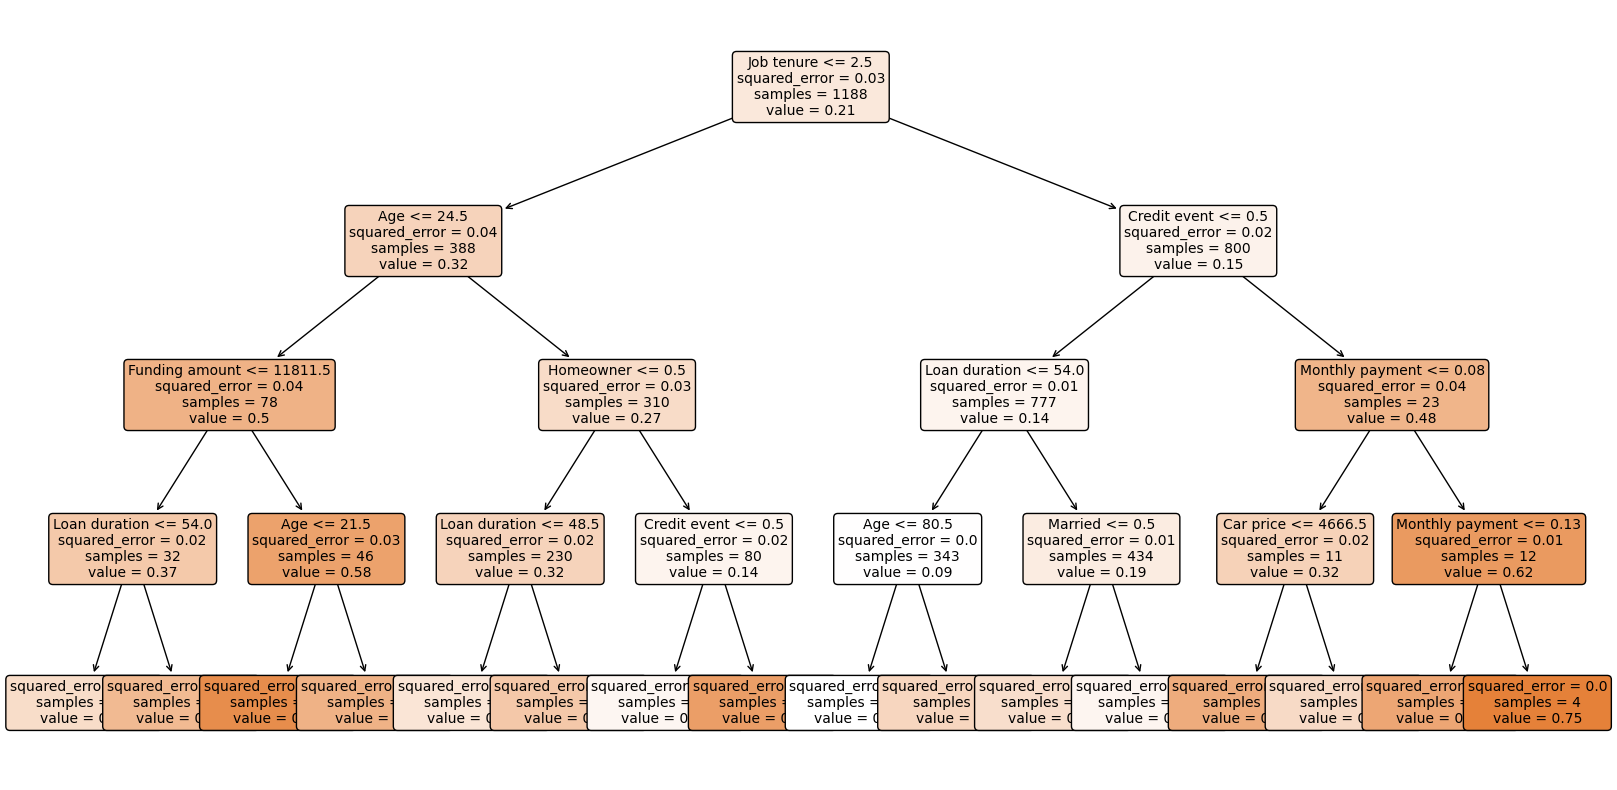

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set up the plot size (adjust as needed)
plt.figure(figsize=(20, 10))

feature_names = X.columns.tolist()

# Plot the tree with decision rules displayed
plot_tree(
    tree_model,
    filled=True,
    feature_names=feature_names,
    rounded=True,
    precision=2,  # Display numerical precision
    proportion=False,  # False means we will show the sample count, not proportion
    fontsize=10,  # Adjust font size for readability
    impurity=True,  # Show impurity (Gini or Entropy)
    class_names=None,
)  # Show class names if available

# Show the plot
plt.show()

STANDARD DECISION TREE PREDICTION

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set using the surrogate model
y_pred_surrogate = tree_model.predict(X_test)

# Evaluate the surrogate model performance
mse = mean_squared_error(y_test, y_pred_surrogate)
r2 = r2_score(y_test, y_pred_surrogate)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.01375586837795162
R-squared: 0.5241964536659012


In [13]:
# Ridge Regression as Surrogate
ridge_surrogate = Ridge(alpha=1.0)
ridge_surrogate.fit(X, y_pred_surrogate)

ValueError: Found input variables with inconsistent numbers of samples: [1486, 298]